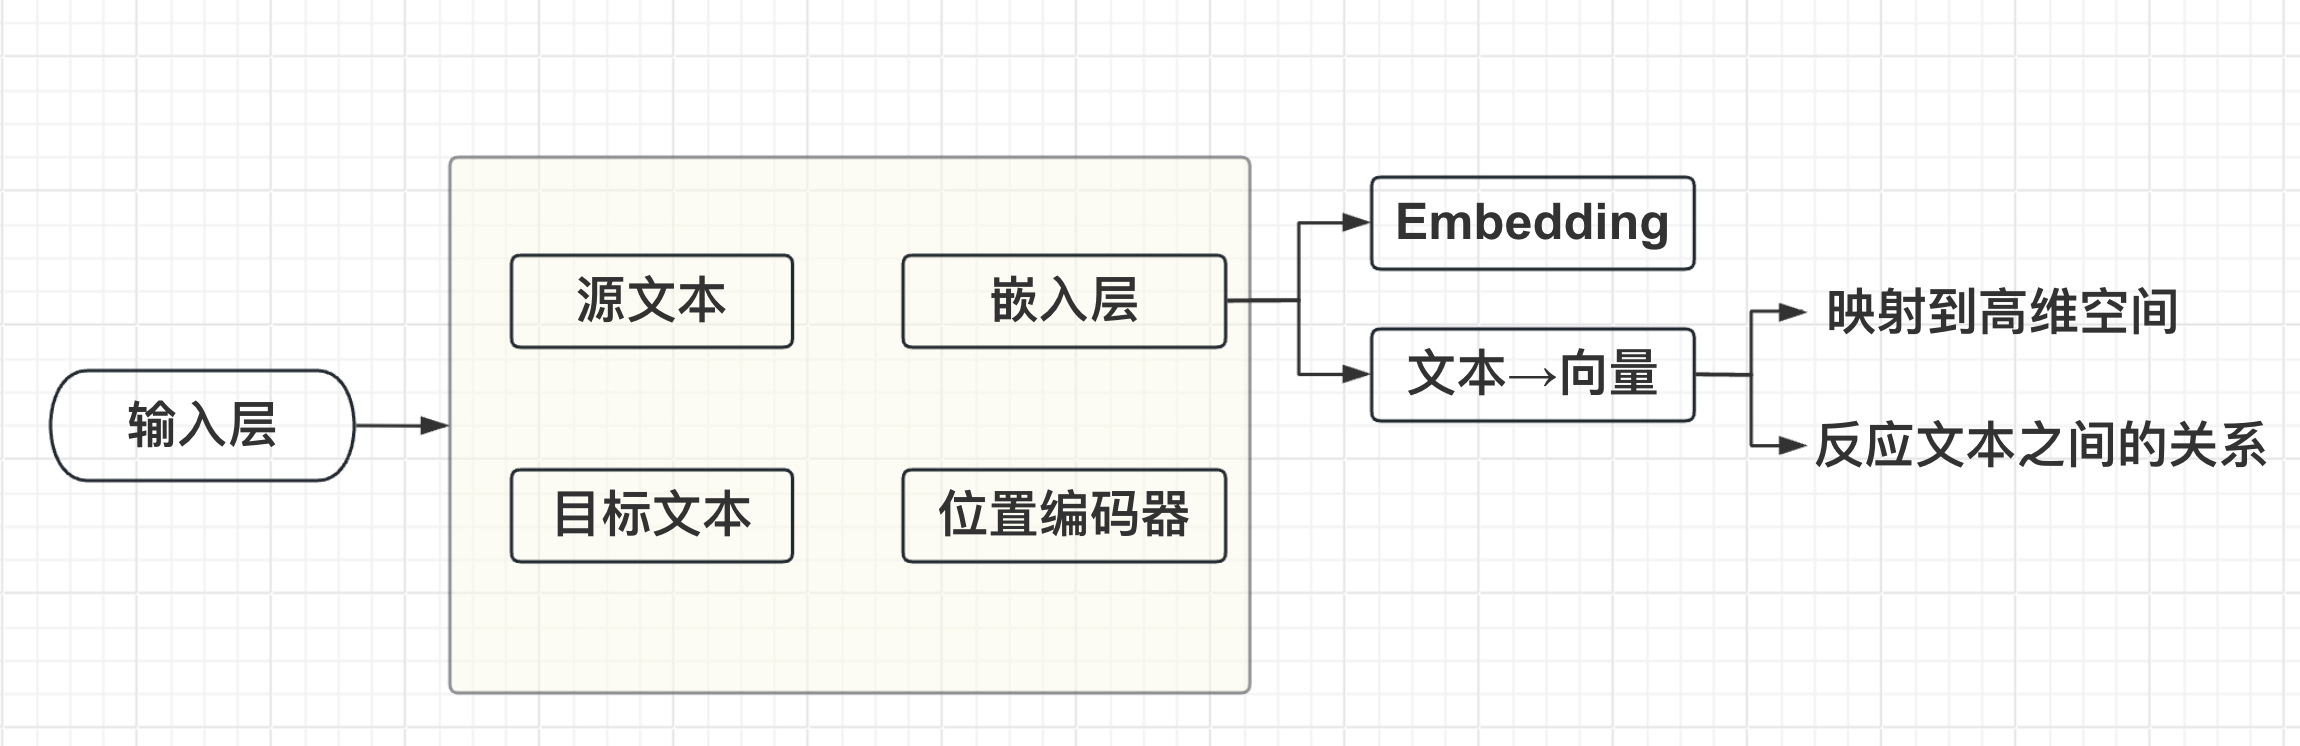

- `import torch`导入必备的工具包
- `import torch.nn as nn`预定义的网络层torch.nn 已经开发了常用层
  - 比如 卷积层、lstm层、embedding层 不需要重新造轮子
- `import math`数学计算工具包
- `from torch.autograd import Variable`torch中变量封装函数Variable

In [2]:
import torch
import torch.nn as nn
import math
from torch.autograd import Variable

- `class Embeddings(nn.Module)`
  - 定义Embedding**s**类实现文本嵌入层
  - s说明两个一模一样的嵌入层，共享参数
  - 该类继承nn.Module  
- `def __init__(self, d_model, vocab)`
  - 类的初始化函数，有两个参数
  - d_model：指词嵌入的维度
  - vocab：词表的大小
- `super(Embeddings,self).__init__()`
  - 使用super方法指明继承nn.Module的初始化函数
- `self.lut = nn.Embedding(vocab,d_model)`
  - 调用nn中的预定义层Embedding，获得一个词嵌入对象self.lut
- `self.d_model = d_model`
  - 将d_model传入类中
- `def forward(self,x):`
  - 该层的前向传播
  - 所有层中都会有这个函数
  - 当传给该类的实例化对象参数时，自动调用该类函数
  - 参数 x：因为Embeddings层是首层，所以代表输入给模型的文本映射成张量
- `return self.lut(x) * math.sqrt(self.d_model)`
  - 将x传给self.lut(x)并与根号下self.d_model相乘作为结果返回

In [3]:
class Embeddings(nn.Module):
    def __init__(self, d_model, vocab):
        super(Embeddings,self).__init__()
        self.lut = nn.Embedding(vocab,d_model)
        self.d_model = d_model
    def forward(self,x):
        return self.lut(x) * math.sqrt(self.d_model)

nn.Embedding演示
- 词表大小是哪个数？
- 带着问题学习

In [18]:
embedding = nn.Embedding(10,3)   # 词表大小=10，嵌入维度=3
input = torch.LongTensor([[1,2,4,5],[4,3,2,9],[1,2,4,5],[7,1,4,5]])
embedding(input)

# 为什么每次运行的结果还不一样？

tensor([[[-1.0286,  0.2788,  1.0806],
         [ 0.4362,  2.2984, -1.0931],
         [ 0.6481,  0.8776,  0.0955],
         [-1.2788, -0.4847,  0.5685]],

        [[ 0.6481,  0.8776,  0.0955],
         [-1.9578,  0.1194,  1.2256],
         [ 0.4362,  2.2984, -1.0931],
         [-0.0782,  1.7194, -0.6835]],

        [[-1.0286,  0.2788,  1.0806],
         [ 0.4362,  2.2984, -1.0931],
         [ 0.6481,  0.8776,  0.0955],
         [-1.2788, -0.4847,  0.5685]],

        [[-0.6606,  0.6219,  1.2766],
         [-1.0286,  0.2788,  1.0806],
         [ 0.6481,  0.8776,  0.0955],
         [-1.2788, -0.4847,  0.5685]]], grad_fn=<EmbeddingBackward0>)

结果解读：
- 每一行是映射后的嵌入
- 比如 1 映射为 [ 0.8956, -0.9747,  1.2423]

- **实例化参数**
  - 什么实例化，跟演示是一个东西
    - 有区别
    - 实例化是 调用自己写的类
    - 演示是调用 nn.Module 的

In [6]:
# 词嵌入维度=512
d_model = 512
# 词表大小=1000
vocab = 1000

- 输入参数

In [7]:
# 输入x是一个使用Variable封装的长整型张量，形状是2×4
x = Variable(torch.LongTensor([[100,2,421,508],[491,998,2,221]]))

- 调用

In [11]:
emb = Embeddings(d_model=d_model,vocab=vocab)
embr = emb(x)
print("embr:",embr)

# 为什么每次运行的结果不一样
# self.lut的命名规则是什么？

embr: tensor([[[ 10.9559,  34.0994, -18.2389,  ...,   6.2772,  18.4302,  -7.1566],
         [ 16.4422,  64.4827,  14.7430,  ..., -48.7065,  14.0778, -23.5059],
         [-28.3775,  30.3135,   8.4914,  ..., -39.7796, -17.1370,  13.3443],
         [-52.8728, -14.8138, -54.6810,  ...,   8.5567, -19.7279,  -5.6599]],

        [[-14.0887,  -9.4221, -17.5307,  ..., -29.4641,   6.1998,  -4.4559],
         [ 17.4303, -45.7113,  -2.8527,  ...,   2.0378,  21.1742,  16.8536],
         [ 16.4422,  64.4827,  14.7430,  ..., -48.7065,  14.0778, -23.5059],
         [  6.1996,  19.0311,  23.8067,  ...,  -1.3520, -30.7953,  29.2193]]],
       grad_fn=<MulBackward0>)
